<a href="https://colab.research.google.com/github/KrishnaTSasi/CODEALPHA_3/blob/main/Code3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAR PRICE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


PREPROCESS DATA

In [ ]:
# Drop Car_Name
df.drop('Car_Name', axis=1, inplace=True)

In [ ]:
# Calculate car age from Year
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

ENCODING

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

DISTRIBUTION OF SELLING PRICE

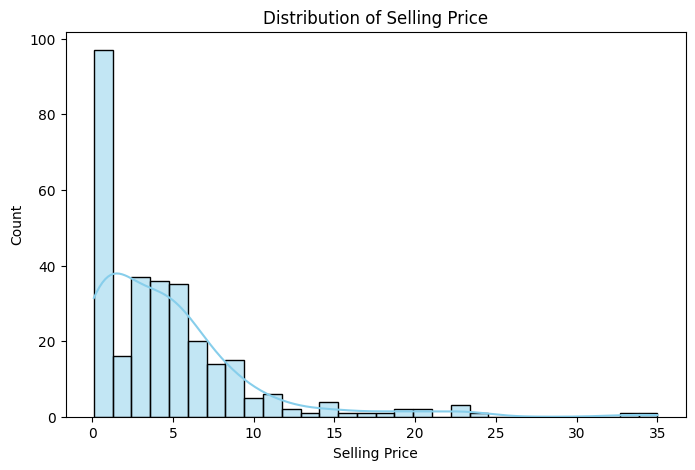

In [ ]:
# Plot the distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

DISTRIBUTION OF PRESENT PRICE

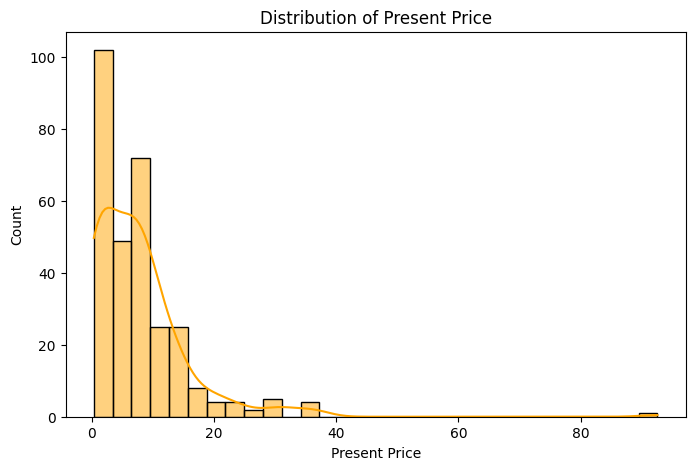

In [ ]:
# Plot the distribution of Present Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Present_Price'], kde=True, color='orange', bins=30)
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")
plt.ylabel("Count")
plt.show()

BOXPLOT

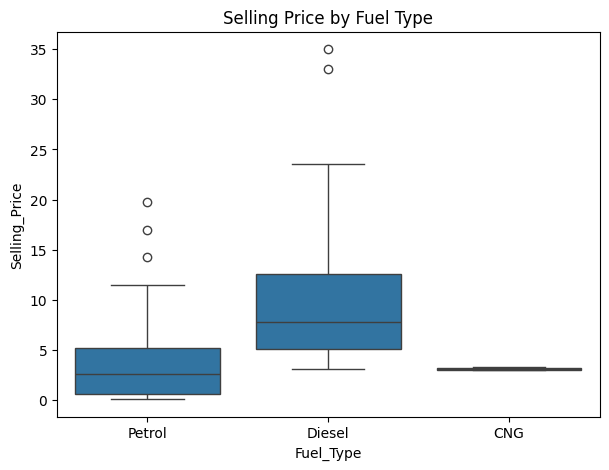

In [ ]:
# Selling Price vs Fuel Type using Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Fuel Type")
plt.show()

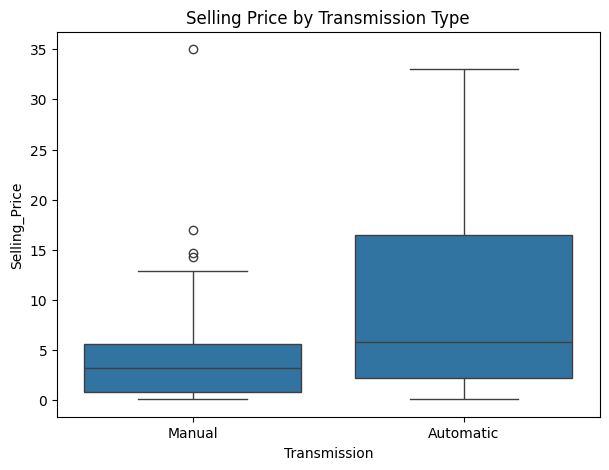

In [ ]:
# Selling Price vs Transmission using Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price by Transmission Type")
plt.show()

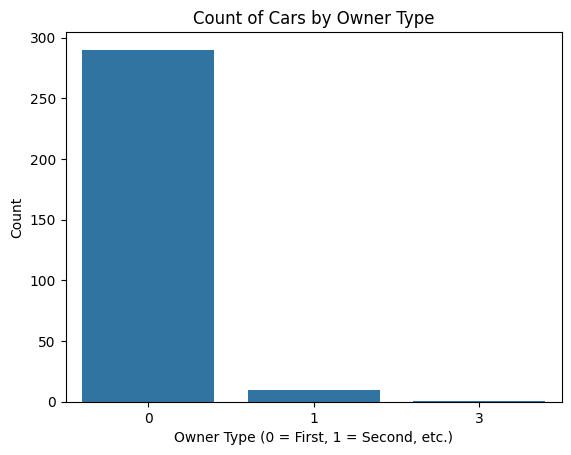

In [ ]:
# Count plot: Owner
sns.countplot(x='Owner', data=df)
plt.title("Count of Cars by Owner Type")
plt.xlabel("Owner Type (0 = First, 1 = Second, etc.)")
plt.ylabel("Count")
plt.show()

Scatter Plots for Key Features

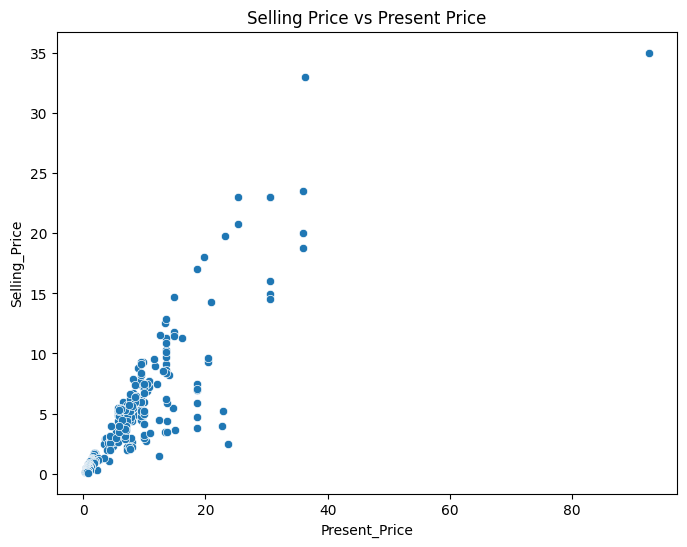

In [ ]:
# Selling Price vs Present Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Selling Price vs Present Price")
plt.show()

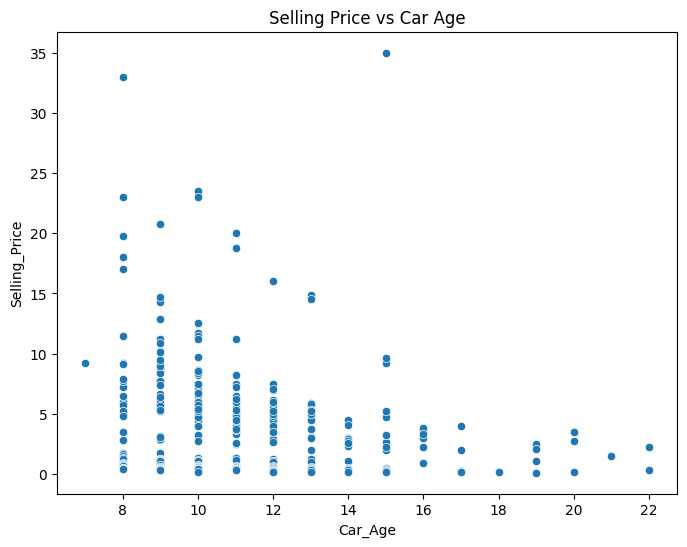

In [ ]:
# Selling Price vs Car Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Selling Price vs Car Age")
plt.show()

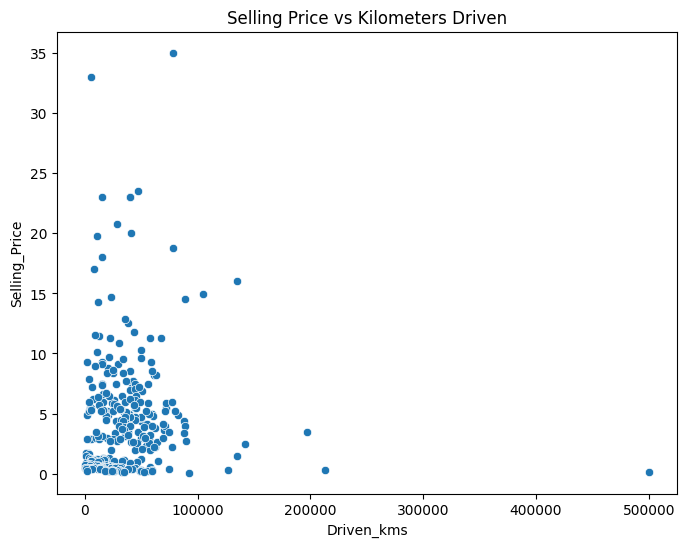

In [ ]:
# Selling Price vs Driven_kms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title("Selling Price vs Kilometers Driven")
plt.show()

HEATMAP

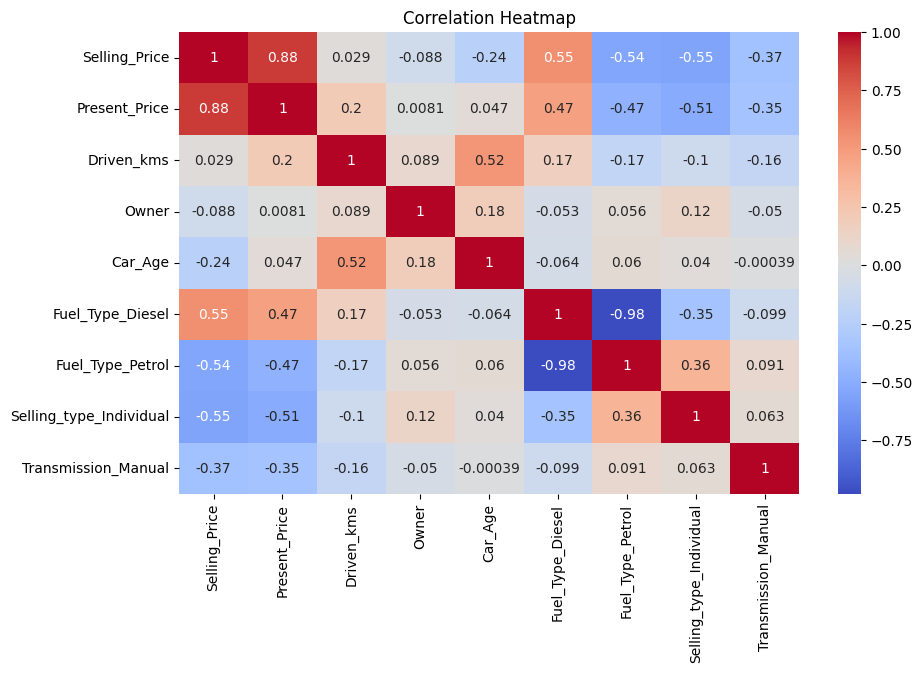

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Features and target
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Split into train and test tests
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

MODEL TRAINING AND EVALUATION

Logistic Regression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)

In [ ]:
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print(" R2 Score:", r2_score(y_test,y_pred_lr))

 Mean Squared Error: 3.4813498305118524
 R2 Score: 0.8488707839193139


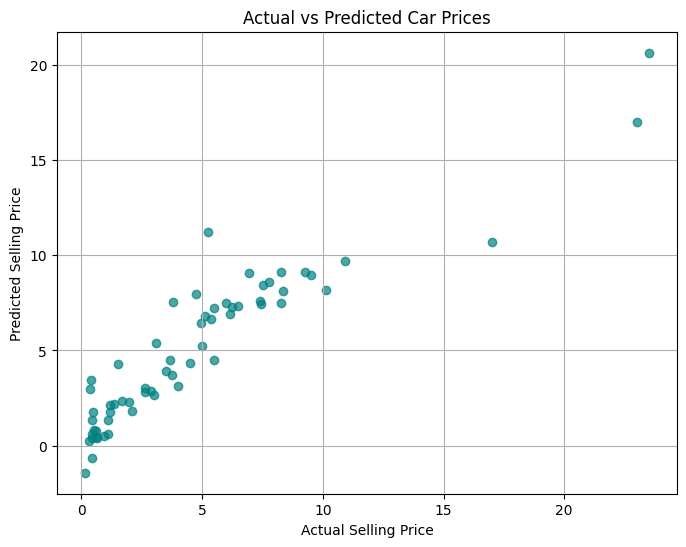

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

Random Forest R2 Score: 0.9622776036607653
Random Forest MSE: 0.8689574491803268


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)
print("XGBoost R2 Score:", r2_score(y_test, xgb_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))

XGBoost R2 Score: 0.9524390988260215
XGBoost MSE: 1.0955931588543528


Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

svr_pred = svr_model.predict(x_test)
print("SVR R2 Score:", r2_score(y_test, svr_pred))
print("SVR MSE:", mean_squared_error(y_test, svr_pred))

SVR R2 Score: 0.7813283543245669
SVR MSE: 5.037229176147399


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_test)
print("Decision Tree R2 Score:", r2_score(y_test, dt_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

Decision Tree R2 Score: 0.9449418476794312
Decision Tree MSE: 1.2682967213114755


Ridge and Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(x_train, y_train)
print("Ridge R2:", r2_score(y_test, ridge.predict(x_test)))

lasso = Lasso()
lasso.fit(x_train, y_train)
print("Lasso R2:", r2_score(y_test, lasso.predict(x_test)))

Ridge R2: 0.8484307496805689
Lasso R2: 0.6804543684000999


 Visual Comparison

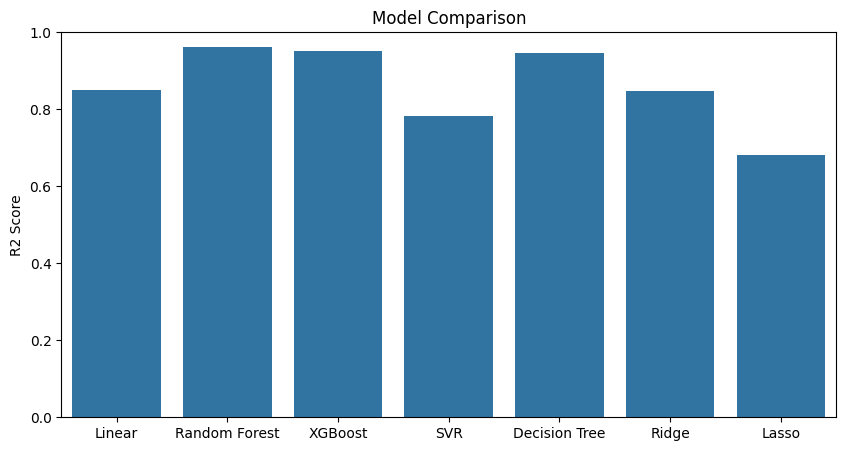

In [ ]:
models = ['Linear', 'Random Forest', 'XGBoost', 'SVR', 'Decision Tree', 'Ridge', 'Lasso']
r2_scores = [
    r2_score(y_test, model.predict(x_test))
    for model in [lr, rf_model, xgb_model, svr_model, dt_model, ridge, lasso]
]
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=r2_scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()